# Processing a a run (using >1 module)

In [1]:
%load_ext autoreload
%autoreload 2s

#### imports

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import sys
sys.path.append('../')

import pylars
from pylars.plotting.plotprocessed import *
from pylars.plotting.plotwaveforms import *
from pylars.processing.waveforms import waveform_processing
from pylars.processing.peaks import peak_processing
from pylars.utils import *

# glob.glob to search the path -> returns list
# glob.iglob to search the path -> returns iterator

## Define and load the desired run

In [5]:
base_run = run(run_number = 6, main_data_path='/disk/gfs_atp/xenoscope/SiPMs/char_campaign/raw_data/')

In [6]:
all_runs = base_run.get_run_df()

In [7]:
all_runs.head()

,kind,module,temp,vbias,path
0,BV,1,175.0,46.00,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
1,BV,0,175.0,46.00,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
2,BV,0,170.0,46.75,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
3,BV,1,170.0,46.75,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...
4,BV,1,170.0,50.75,/disk/gfs_atp/xenoscope/SiPMs/char_campaign/ra...


## Define and load processor

In [11]:
process = pylars.processing.run_processor(base_run, 'simple', sigma_level=5, baseline_samples=50)

In [12]:
#For processing full runs tqdm per channels comes off by default
process.print_tqdm_options()
process.set_tqdm_channel(bar=True, show=True)
process.set_tqdm_run(bar=False, show=False)
process.print_tqdm_options()

show bar channel:False
show tqdm channel:False
show bar run:True
show tqdm run:True
show bar channel:True
show tqdm channel:True
show bar run:False
show tqdm run:False


In [14]:
data = process.process_datasets(kind='BV', vbias=50.75, temp = 170)

Found 2 datasets. Ramping up processor!


Processing module 0 channel wf6: 100%|█████████████████████████| 50000/50000 [00:05<00:00, 9823.80it/s]


#### #Done

In [15]:
data.head()

,module,channel,wf_number,peak_number,area,length,position
0,1,wf0,1,0,0.0,1,157
1,1,wf0,1,1,0.0,1,286
2,1,wf0,1,2,0.0,1,291
3,1,wf0,1,3,0.0,1,299
4,1,wf0,1,4,80.0,2,301


## Make some plots

In [16]:
mod0_ch0 = data[(data['channel']=='wf0') &
                (data['module']==0)]

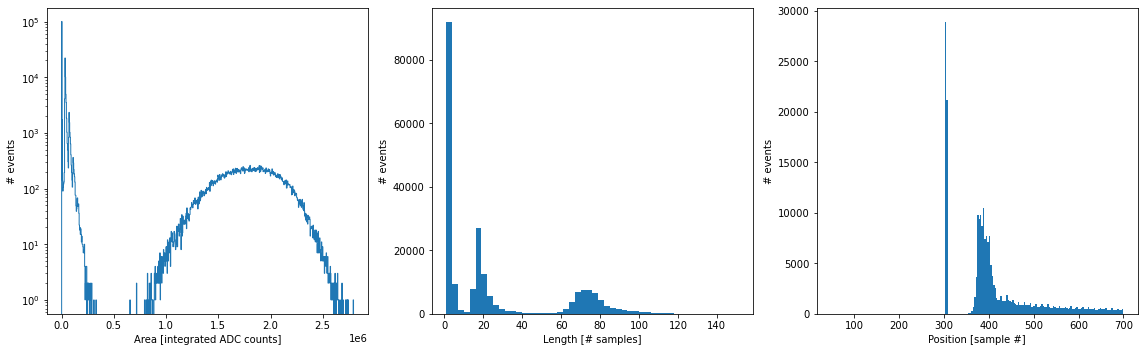

In [18]:
fig, axs = plt.subplots(1,3,figsize=(16,5))
axs = plot_3hists(mod0_ch0, axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

#### Just LED signal

In [25]:
cut_mask = ((mod0_ch0['position'] > 300) &
            (mod0_ch0['position'] < 350) &
            (mod0_ch0['length'] > 20))

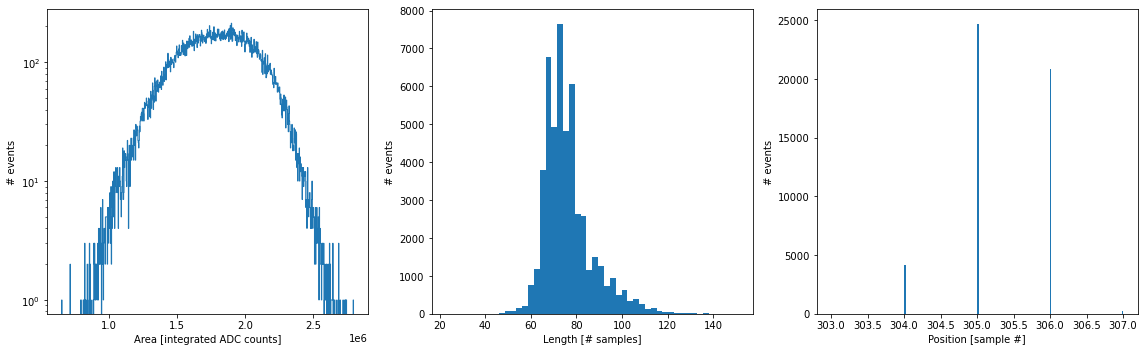

In [26]:
fig, axs = plt.subplots(1,3,figsize=(16,5))
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

#### Just to the rigth of the LED peak

In [27]:
cut_mask = ((mod0_ch0['position'] > 350))

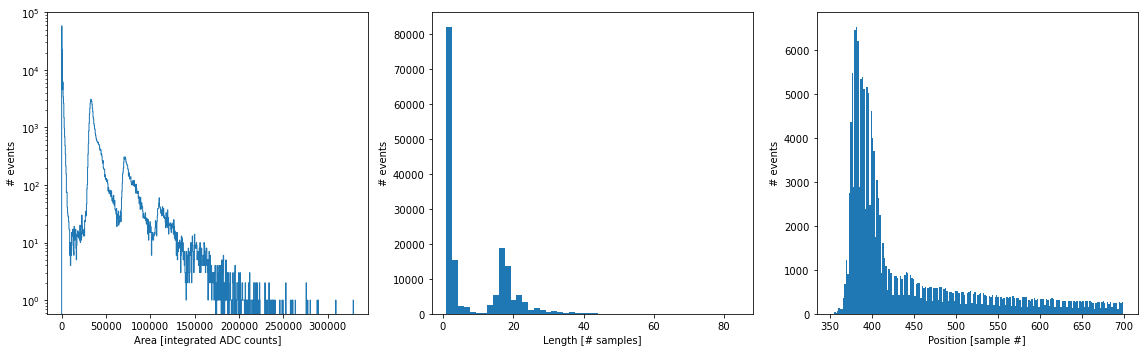

In [28]:
fig, axs = plt.subplots(1,3,figsize=(16,5))
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

In [29]:
cut_mask = ((mod0_ch0['position'] > 350) &
            (mod0_ch0['length'] > 10))

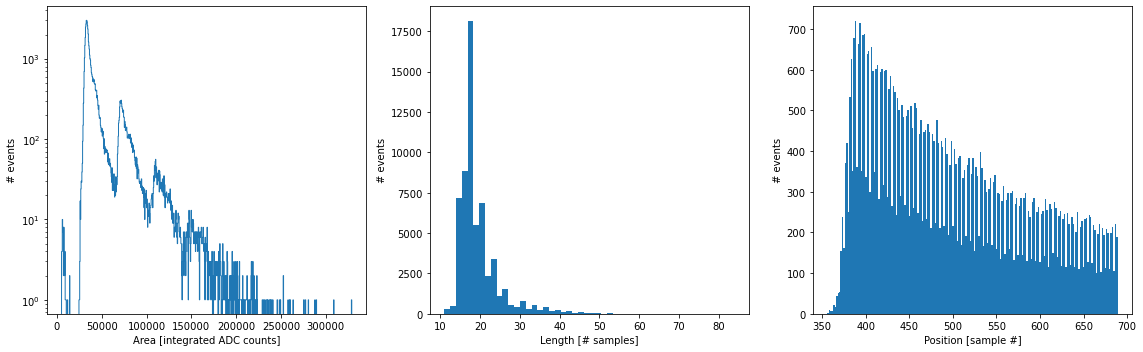

In [31]:
fig, axs = plt.subplots(1,3,figsize=(16,5))
axs = plot_3hists(mod0_ch0[cut_mask], axs = axs)
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

These are very likely afterpulses! Nice! 

## Save the processed data

In [49]:
#atm the output of process_datasets is a pd.dataframe 
#that needs to be loaded to a processed_dataset
#object, in the future the output will be the object
#and to access the dataframe will be processed_dataset.data

processed_data = processed_dataset(run = base_run,
                                   kind = 'BV',
                                   vbias = 50.75, 
                                   temp = 170, 
                                   path_processed = '/disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/',
                                   process_hash= process.hash)

In [50]:
processed_data.__dict__

{'run': <pylars.utils.input.run at 0x7f148c1f02e0>,
 'kind': 'BV',
 'vbias': 50.75,
 'temp': 170,
 'process_hash': 2460116862163250183,
 'path_processed': '/disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/',
 'hash': '5425091988894277140'}

In [51]:
processed_data.load_data()

FileNotFoundError: Requested processed data not found. Process and save with load_data(force=True) or process and save with save_data.

In [52]:
processed_data.input_data(data)

In [56]:
processed_data.save_data()

Saved file to: /disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/run6/BV_170_50.75-2460116862163250183.h5


In [58]:
processed_data.data.iloc[1234]

module            1
channel         wf0
wf_number      1937
peak_number       3
area           70.0
length            2
position        434
Name: 1234, dtype: object

### Delete and load from cache

In [59]:
del processed_data, data

In [61]:
processed_data = processed_dataset(run = base_run,
                                   kind = 'BV',
                                   vbias = 50.75, 
                                   temp = 170, 
                                   path_processed = '/disk/gfs_atp/xenoscope/SiPMs/char_campaign/processed_data/',
                                   process_hash= process.hash)

In [65]:
processed_data.load_data()

In [66]:
processed_data.data.iloc[1234]

module            1
channel         wf0
wf_number      1937
peak_number       3
area           70.0
length            2
position        434
Name: 1234, dtype: object